In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from scipy import stats
from fitter import Fitter, get_common_distributions, get_distributions

In [3]:
def load_dataset(dataset_number):
    data_path = '~/data/datasets/'

    data_path = os.path.join(data_path, f'dataset{dataset_number}')
    dataset_path = os.path.join(data_path, 'dataset.csv')
    wn_path = os.path.join(data_path, 'wavenumbers.csv')

    dataset = pd.read_csv(dataset_path)
    wn = pd.read_csv(wn_path).to_numpy().reshape(-1)

    return dataset, wn

In [4]:
dataset1, wn1 = load_dataset(1)

spectra1 = dataset1.iloc[:, :-3]
spectra1.columns = wn1
hba1c1 = dataset1['HbA1c']
sex1 = dataset1['Sex']
age1 = dataset1['Age']

<Axes: >

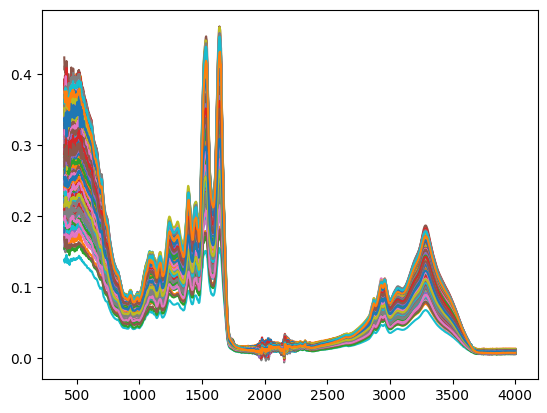

In [5]:
spectra1.T.plot(legend=False)

<Axes: xlabel='HbA1c', ylabel='Count'>

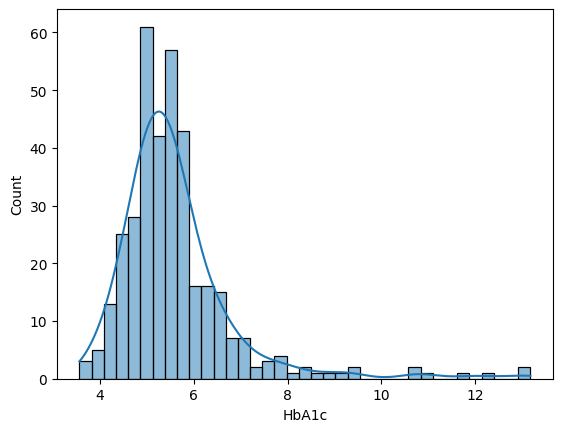

In [6]:
sns.histplot(hba1c1, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

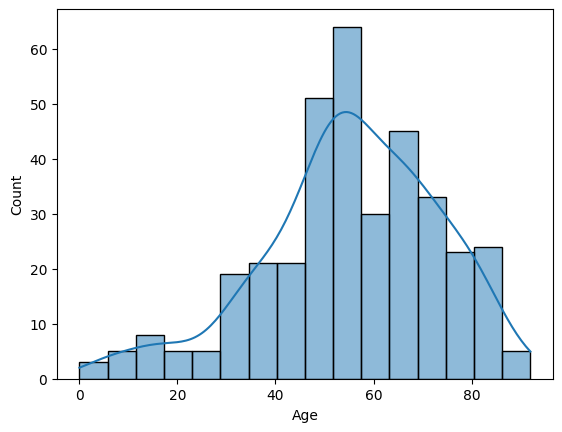

In [7]:
sns.histplot(age1, kde=True)

In [8]:
dataset3, wn3 = load_dataset(3)

spectra3 = dataset3.iloc[:, :-5]
spectra3.columns = wn3
hba1c3 = dataset1['HbA1c']
sex3 = dataset1['Sex']
age3 = dataset1['Age']

<Axes: >

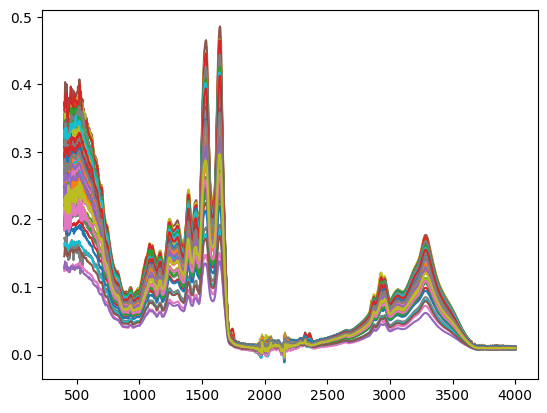

In [9]:
spectra3.T.plot(legend=False)

<Axes: xlabel='HbA1c', ylabel='Count'>

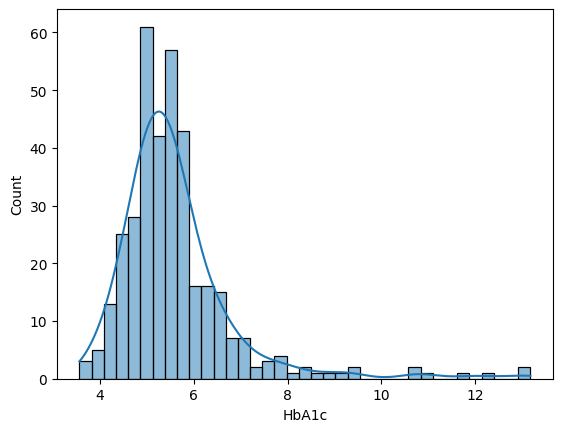

In [10]:
sns.histplot(hba1c3, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

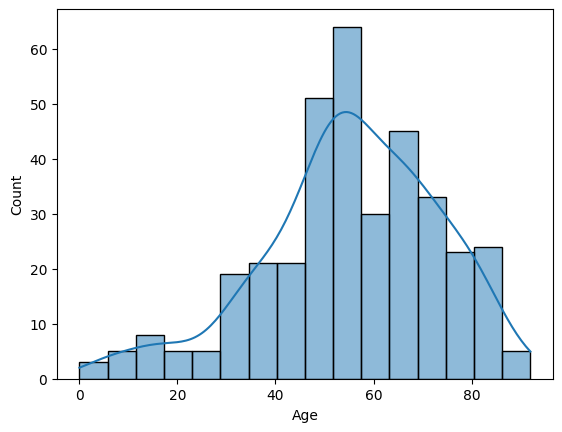

In [11]:
sns.histplot(age3, kde=True)

<Axes: >

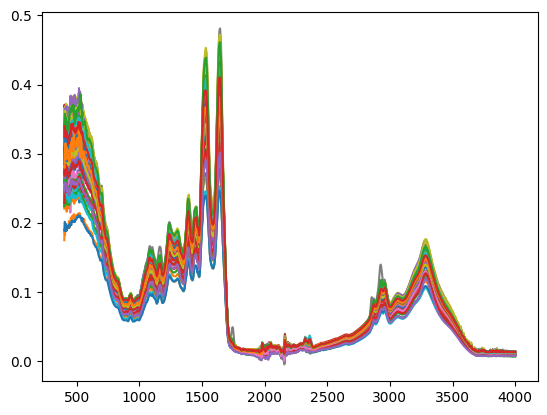

In [12]:
spectra2 = pd.read_csv('~/data/datasets/dataset2/spectra.csv', index_col=0)
spectra2.columns = wn3
spectra2.T.plot(legend=False)

In [13]:
info = pd.read_excel('~/data/datasets/dataset2/COVID_telomers_final_DK_no_sur.xlsx')
info.columns

Index(['N_vict', 'COVID_19', 'Covid_severity', 'No_treatment', 'vit_D_Zn',
       'antibiotics', 'oxygen', 'steroids', 'ШВЛ', 'telomer_lenth', 'mDNA',
       'age', 'Monotherapy', 'Combo_ADD_ins', 'Combo_ADD', 'Metformin', 'SUs',
       'DPP_4', 'GLP_1', 'SGLT_2', 'PPAR_g', 'Insulin_human', 'Insulin_analog',
       'Diet', 'nephropathy', 'neuropathy', 'autonomic_neur', 'retinopathy',
       'diab_foot', 'no_complication', 'MI', 'Stroke', 'weight', 'height',
       'BMI', 'T2D_duration', 'WC', 'Chol', 'hs_CRP', 'HbA1C_before', 'HbA1C',
       'vit_D', 'A1', 'ApoB', 'IL_6', 'C_pep'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

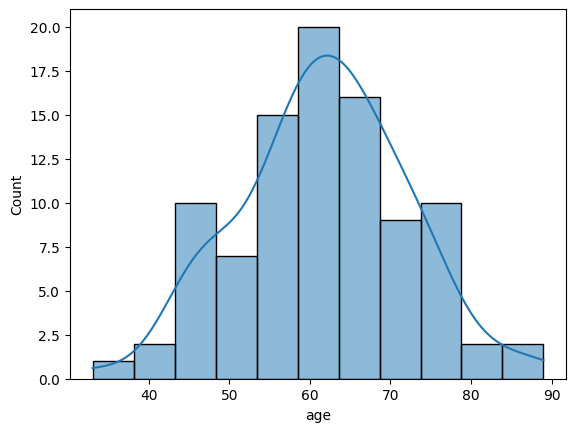

In [14]:
age2 = info['age'].astype(np.int32)
sns.histplot(age2, kde=True)

<Axes: ylabel='Count'>

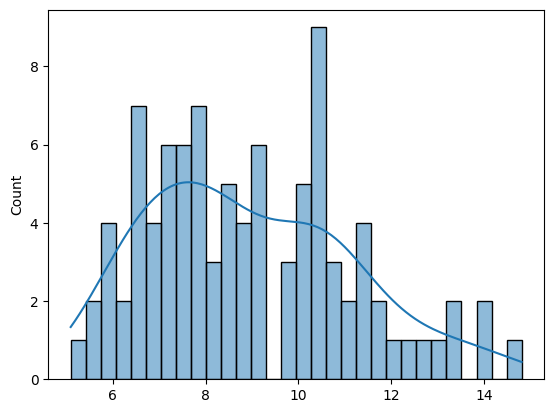

In [15]:
sns.histplot(info['HbA1C'].values, kde=True, bins=30)

In [16]:
spectra1

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
0,0.360848,0.364705,0.367689,0.369015,0.368719,0.367619,0.366845,0.367258,0.369063,0.371720,...,0.006283,0.006283,0.006283,0.006283,0.006281,0.006278,0.006273,0.006265,0.006254,0.006240
1,0.234050,0.235911,0.237265,0.237733,0.237352,0.236584,0.236083,0.236390,0.237710,0.239826,...,0.010900,0.010891,0.010881,0.010872,0.010865,0.010859,0.010856,0.010855,0.010858,0.010865
2,0.297825,0.295398,0.293299,0.291435,0.289849,0.288723,0.288242,0.288441,0.289108,0.289821,...,0.009913,0.009927,0.009943,0.009961,0.009976,0.009986,0.009990,0.009990,0.009986,0.009982
3,0.374568,0.371391,0.368942,0.366472,0.363799,0.361338,0.359787,0.359719,0.361294,0.364154,...,0.008789,0.008794,0.008798,0.008803,0.008806,0.008810,0.008814,0.008817,0.008820,0.008822
4,0.237110,0.240726,0.244406,0.247558,0.249953,0.251774,0.253422,0.255246,0.257309,0.259338,...,0.009426,0.009423,0.009417,0.009409,0.009401,0.009396,0.009394,0.009399,0.009408,0.009421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.217310,0.218709,0.220022,0.220882,0.221185,0.221113,0.221017,0.221188,0.221682,0.222269,...,0.007302,0.007301,0.007299,0.007294,0.007286,0.007275,0.007263,0.007253,0.007248,0.007247
358,0.213325,0.213964,0.215273,0.216570,0.217357,0.217480,0.217092,0.216491,0.215936,0.215553,...,0.008743,0.008730,0.008720,0.008714,0.008714,0.008721,0.008735,0.008756,0.008780,0.008805
359,0.358854,0.361681,0.364897,0.367508,0.369161,0.370154,0.371139,0.372643,0.374736,0.376910,...,0.009356,0.009357,0.009351,0.009337,0.009317,0.009292,0.009268,0.009246,0.009230,0.009220
360,0.255284,0.255334,0.254288,0.252129,0.249226,0.246259,0.243977,0.242911,0.243212,0.244627,...,0.009815,0.009817,0.009818,0.009821,0.009825,0.009830,0.009835,0.009837,0.009837,0.009834


In [17]:
spectra2 = spectra2.iloc[:, 1:]
spectra2

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
10,0.283343,0.282757,0.282457,0.282015,0.281222,0.280224,0.279445,0.279336,0.280137,0.281735,...,0.010634,0.010635,0.010628,0.010614,0.010597,0.010577,0.010558,0.010543,0.010532,0.010527
100,0.327797,0.328351,0.329645,0.330743,0.330973,0.330206,0.328828,0.327449,0.326579,0.326418,...,0.012545,0.012542,0.012547,0.012560,0.012576,0.012594,0.012609,0.012622,0.012632,0.012638
101,0.300130,0.299970,0.300528,0.300996,0.300876,0.300145,0.299158,0.298364,0.298043,0.298166,...,0.010983,0.010961,0.010945,0.010937,0.010936,0.010941,0.010950,0.010959,0.010968,0.010976
102,0.368977,0.370072,0.370757,0.370176,0.367946,0.364350,0.360100,0.355919,0.352189,0.348842,...,0.014236,0.014227,0.014212,0.014189,0.014158,0.014118,0.014072,0.014026,0.013983,0.013951
11,0.247684,0.246603,0.245742,0.244727,0.243456,0.242145,0.241206,0.241008,0.241686,0.243060,...,0.010343,0.010323,0.010301,0.010278,0.010255,0.010232,0.010211,0.010194,0.010184,0.010182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012119,0.012100,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098
95,0.290365,0.293309,0.297544,0.302105,0.306281,0.309828,0.312935,0.315946,0.319060,0.322146,...,0.013510,0.013484,0.013465,0.013453,0.013448,0.013449,0.013453,0.013461,0.013472,0.013485
96,0.279543,0.279421,0.280799,0.283000,0.285502,0.288077,0.290778,0.293765,0.297095,0.300588,...,0.012540,0.012517,0.012500,0.012488,0.012482,0.012478,0.012477,0.012479,0.012482,0.012487
97,0.340582,0.342574,0.345555,0.348693,0.351351,0.353295,0.354679,0.355790,0.356789,0.357557,...,0.012845,0.012814,0.012788,0.012767,0.012754,0.012745,0.012739,0.012736,0.012736,0.012738


In [18]:
spectra3 = spectra3.iloc[:, 1:]
spectra3

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
0,0.287384,0.282910,0.277133,0.269982,0.261934,0.253944,0.247124,0.242393,0.240260,0.240778,...,0.008766,0.008771,0.008776,0.008780,0.008784,0.008786,0.008786,0.008784,0.008779,0.008771
1,0.284299,0.285566,0.287428,0.289343,0.291023,0.292534,0.294187,0.296272,0.298805,0.301438,...,0.009802,0.009808,0.009806,0.009795,0.009778,0.009756,0.009734,0.009718,0.009712,0.009715
2,0.328069,0.331918,0.334630,0.335661,0.335183,0.334053,0.333418,0.334155,0.336462,0.339691,...,0.011390,0.011361,0.011332,0.011306,0.011285,0.011270,0.011260,0.011256,0.011256,0.011260
3,0.185417,0.186708,0.187974,0.188820,0.189097,0.188955,0.188749,0.188826,0.189355,0.190230,...,0.009413,0.009395,0.009376,0.009361,0.009350,0.009345,0.009346,0.009350,0.009356,0.009362
4,0.225337,0.227945,0.230671,0.233155,0.235231,0.237008,0.238779,0.240839,0.243284,0.245920,...,0.011466,0.011445,0.011422,0.011399,0.011376,0.011358,0.011345,0.011340,0.011342,0.011350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.235006,0.237765,0.240452,0.242631,0.244127,0.245070,0.245787,0.246580,0.247551,0.248548,...,0.009036,0.009033,0.009025,0.009013,0.008998,0.008981,0.008966,0.008954,0.008947,0.008945
105,0.184371,0.183669,0.184776,0.187351,0.191008,0.195388,0.200154,0.204942,0.209283,0.212590,...,0.009824,0.009806,0.009787,0.009767,0.009747,0.009727,0.009710,0.009696,0.009689,0.009689
106,0.184371,0.183669,0.184776,0.187351,0.191008,0.195388,0.200154,0.204942,0.209283,0.212590,...,0.009824,0.009806,0.009787,0.009767,0.009747,0.009727,0.009710,0.009696,0.009689,0.009689
107,0.270295,0.273169,0.276142,0.278616,0.280340,0.281479,0.282462,0.283695,0.285311,0.287081,...,0.010565,0.010549,0.010528,0.010506,0.010486,0.010468,0.010457,0.010452,0.010453,0.010460


In [19]:
data1 = spectra1.copy()
data1['HbA1c'] = hba1c1
data1['Age'] = age1

In [20]:
data3 = spectra3.copy()
data3['HbA1c'] = hba1c3
data3['Age'] = age3
data3

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3996.813,3997.295,3997.777,3998.259,3998.741,3999.224,3999.706,4000.188,HbA1c,Age
0,0.287384,0.282910,0.277133,0.269982,0.261934,0.253944,0.247124,0.242393,0.240260,0.240778,...,0.008776,0.008780,0.008784,0.008786,0.008786,0.008784,0.008779,0.008771,5.48,92
1,0.284299,0.285566,0.287428,0.289343,0.291023,0.292534,0.294187,0.296272,0.298805,0.301438,...,0.009806,0.009795,0.009778,0.009756,0.009734,0.009718,0.009712,0.009715,3.89,92
2,0.328069,0.331918,0.334630,0.335661,0.335183,0.334053,0.333418,0.334155,0.336462,0.339691,...,0.011332,0.011306,0.011285,0.011270,0.011260,0.011256,0.011256,0.011260,5.01,91
3,0.185417,0.186708,0.187974,0.188820,0.189097,0.188955,0.188749,0.188826,0.189355,0.190230,...,0.009376,0.009361,0.009350,0.009345,0.009346,0.009350,0.009356,0.009362,8.12,90
4,0.225337,0.227945,0.230671,0.233155,0.235231,0.237008,0.238779,0.240839,0.243284,0.245920,...,0.011422,0.011399,0.011376,0.011358,0.011345,0.011340,0.011342,0.011350,9.46,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.235006,0.237765,0.240452,0.242631,0.244127,0.245070,0.245787,0.246580,0.247551,0.248548,...,0.009025,0.009013,0.008998,0.008981,0.008966,0.008954,0.008947,0.008945,10.90,66
105,0.184371,0.183669,0.184776,0.187351,0.191008,0.195388,0.200154,0.204942,0.209283,0.212590,...,0.009787,0.009767,0.009747,0.009727,0.009710,0.009696,0.009689,0.009689,4.72,66
106,0.184371,0.183669,0.184776,0.187351,0.191008,0.195388,0.200154,0.204942,0.209283,0.212590,...,0.009787,0.009767,0.009747,0.009727,0.009710,0.009696,0.009689,0.009689,4.95,66
107,0.270295,0.273169,0.276142,0.278616,0.280340,0.281479,0.282462,0.283695,0.285311,0.287081,...,0.010528,0.010506,0.010486,0.010468,0.010457,0.010452,0.010453,0.010460,6.30,66


In [21]:
hba1c3

0      5.48
1      3.89
2      5.01
3      8.12
4      9.46
       ... 
357    5.66
358    4.32
359    4.75
360    5.67
361    4.40
Name: HbA1c, Length: 362, dtype: float64

In [22]:
spectra2

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
10,0.283343,0.282757,0.282457,0.282015,0.281222,0.280224,0.279445,0.279336,0.280137,0.281735,...,0.010634,0.010635,0.010628,0.010614,0.010597,0.010577,0.010558,0.010543,0.010532,0.010527
100,0.327797,0.328351,0.329645,0.330743,0.330973,0.330206,0.328828,0.327449,0.326579,0.326418,...,0.012545,0.012542,0.012547,0.012560,0.012576,0.012594,0.012609,0.012622,0.012632,0.012638
101,0.300130,0.299970,0.300528,0.300996,0.300876,0.300145,0.299158,0.298364,0.298043,0.298166,...,0.010983,0.010961,0.010945,0.010937,0.010936,0.010941,0.010950,0.010959,0.010968,0.010976
102,0.368977,0.370072,0.370757,0.370176,0.367946,0.364350,0.360100,0.355919,0.352189,0.348842,...,0.014236,0.014227,0.014212,0.014189,0.014158,0.014118,0.014072,0.014026,0.013983,0.013951
11,0.247684,0.246603,0.245742,0.244727,0.243456,0.242145,0.241206,0.241008,0.241686,0.243060,...,0.010343,0.010323,0.010301,0.010278,0.010255,0.010232,0.010211,0.010194,0.010184,0.010182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012119,0.012100,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098
95,0.290365,0.293309,0.297544,0.302105,0.306281,0.309828,0.312935,0.315946,0.319060,0.322146,...,0.013510,0.013484,0.013465,0.013453,0.013448,0.013449,0.013453,0.013461,0.013472,0.013485
96,0.279543,0.279421,0.280799,0.283000,0.285502,0.288077,0.290778,0.293765,0.297095,0.300588,...,0.012540,0.012517,0.012500,0.012488,0.012482,0.012478,0.012477,0.012479,0.012482,0.012487
97,0.340582,0.342574,0.345555,0.348693,0.351351,0.353295,0.354679,0.355790,0.356789,0.357557,...,0.012845,0.012814,0.012788,0.012767,0.012754,0.012745,0.012739,0.012736,0.012736,0.012738


In [23]:
hba1c2 = info[['N_vict', 'HbA1C', 'age']]
hba1c2 = hba1c2.set_index('N_vict')
hba1c2.index.name = None

In [24]:
data2 = spectra2.copy()
data2['HbA1c'] = hba1c2['HbA1C']
data2['Age'] = hba1c2['age']
data2

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3996.813,3997.295,3997.777,3998.259,3998.741,3999.224,3999.706,4000.188,HbA1c,Age
10,0.283343,0.282757,0.282457,0.282015,0.281222,0.280224,0.279445,0.279336,0.280137,0.281735,...,0.010628,0.010614,0.010597,0.010577,0.010558,0.010543,0.010532,0.010527,8.6,62
100,0.327797,0.328351,0.329645,0.330743,0.330973,0.330206,0.328828,0.327449,0.326579,0.326418,...,0.012547,0.012560,0.012576,0.012594,0.012609,0.012622,0.012632,0.012638,6.0,70
101,0.300130,0.299970,0.300528,0.300996,0.300876,0.300145,0.299158,0.298364,0.298043,0.298166,...,0.010945,0.010937,0.010936,0.010941,0.010950,0.010959,0.010968,0.010976,7.1,75
102,0.368977,0.370072,0.370757,0.370176,0.367946,0.364350,0.360100,0.355919,0.352189,0.348842,...,0.014212,0.014189,0.014158,0.014118,0.014072,0.014026,0.013983,0.013951,6.0,70
11,0.247684,0.246603,0.245742,0.244727,0.243456,0.242145,0.241206,0.241008,0.241686,0.243060,...,0.010301,0.010278,0.010255,0.010232,0.010211,0.010194,0.010184,0.010182,13.2,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098,10.2,69
95,0.290365,0.293309,0.297544,0.302105,0.306281,0.309828,0.312935,0.315946,0.319060,0.322146,...,0.013465,0.013453,0.013448,0.013449,0.013453,0.013461,0.013472,0.013485,6.5,58
96,0.279543,0.279421,0.280799,0.283000,0.285502,0.288077,0.290778,0.293765,0.297095,0.300588,...,0.012500,0.012488,0.012482,0.012478,0.012477,0.012479,0.012482,0.012487,6.0,77
97,0.340582,0.342574,0.345555,0.348693,0.351351,0.353295,0.354679,0.355790,0.356789,0.357557,...,0.012788,0.012767,0.012754,0.012745,0.012739,0.012736,0.012736,0.012738,11.5,62


In [25]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(362, 7469)
(94, 7469)
(109, 7469)


In [26]:
temp_array = np.concatenate([
    data1.to_numpy(),
    data2.to_numpy(),
    data3.to_numpy()
])

dataset = pd.DataFrame(temp_array, columns=data1.columns)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Columns: 7469 entries, 400.6456 to Age
dtypes: float64(7469)
memory usage: 32.2 MB


In [27]:
dataset = dataset.sample(n=len(dataset))
dataset

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3996.813,3997.295,3997.777,3998.259,3998.741,3999.224,3999.706,4000.188,HbA1c,Age
42,0.252053,0.253598,0.254435,0.254117,0.252619,0.250394,0.248154,0.246554,0.245932,0.246228,...,0.009200,0.009187,0.009174,0.009163,0.009157,0.009158,0.009164,0.009176,5.12,77.0
358,0.213325,0.213964,0.215273,0.216570,0.217357,0.217480,0.217092,0.216491,0.215936,0.215553,...,0.008720,0.008714,0.008714,0.008721,0.008735,0.008756,0.008780,0.008805,4.32,6.0
470,0.333689,0.334638,0.335916,0.336971,0.337441,0.337332,0.336952,0.336661,0.336639,0.336771,...,0.011127,0.011111,0.011097,0.011085,0.011076,0.011070,0.011067,0.011070,5.40,83.0
451,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098,10.20,69.0
24,0.290250,0.293067,0.295698,0.297657,0.298885,0.299738,0.300750,0.302287,0.304330,0.306419,...,0.009711,0.009720,0.009734,0.009752,0.009772,0.009793,0.009814,0.009834,4.55,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.358854,0.361681,0.364897,0.367508,0.369161,0.370154,0.371139,0.372643,0.374736,0.376910,...,0.009351,0.009337,0.009317,0.009292,0.009268,0.009246,0.009230,0.009220,4.75,5.0
519,0.292636,0.295991,0.301918,0.308828,0.315259,0.320217,0.323289,0.324501,0.324086,0.322351,...,0.011310,0.011289,0.011262,0.011233,0.011204,0.011178,0.011159,0.011150,6.68,73.0
155,0.355229,0.355985,0.358104,0.360095,0.361085,0.361029,0.360479,0.360146,0.360490,0.361533,...,0.009585,0.009604,0.009614,0.009612,0.009599,0.009579,0.009558,0.009540,5.17,58.0
432,0.271155,0.270413,0.270168,0.270236,0.270561,0.271232,0.272381,0.274041,0.276030,0.277946,...,0.010768,0.010774,0.010782,0.010793,0.010805,0.010820,0.010834,0.010846,11.40,48.0


Text(0.5, 1.0, 'HbA1c distribution')

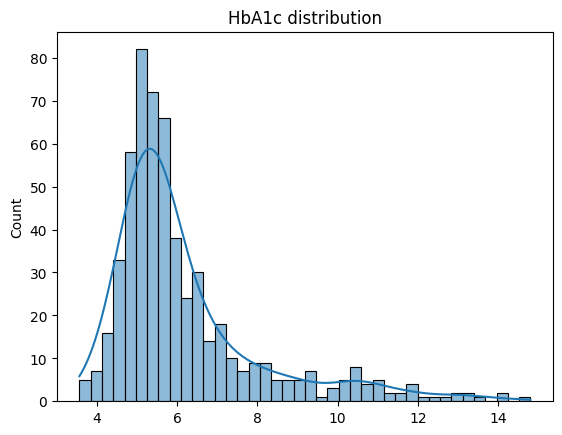

In [28]:
sns.histplot(dataset['HbA1c'].values, kde=True, bins=40)
plt.title("HbA1c distribution")

Text(0.5, 1.0, 'Age of participants distribution')

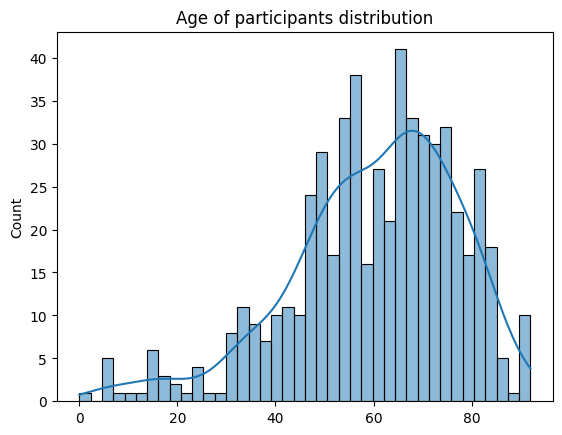

In [29]:
sns.histplot(dataset['Age'].values, kde=True, bins=40)
plt.title("Age of participants distribution")

Number of samples greater then threshold 0.3: 415


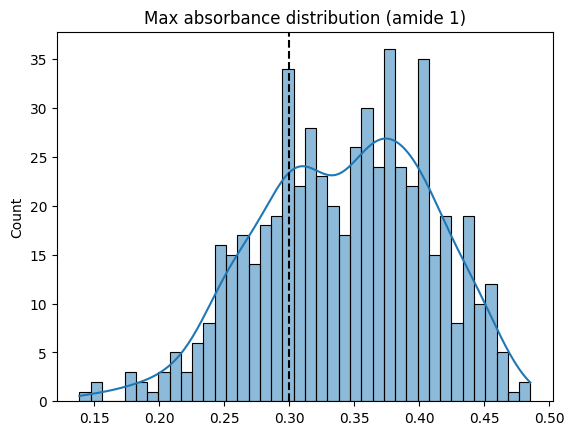

In [30]:
threshold = 0.3

amide1 = dataset.iloc[:, 1000:-2].max(axis=1)
sns.histplot(amide1.values, kde=True, bins=40)
plt.title("Max absorbance distribution (amide 1)")
plt.axvline(x=threshold, linestyle='--', color='k')

num_samples_greater = (amide1.values >= threshold).sum()
print(f"Number of samples greater then threshold {threshold}: {num_samples_greater}")

2024-07-25 14:24:49.347 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.375654)
2024-07-25 14:24:49.369 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.51207)
2024-07-25 14:24:49.380 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=1.006895)
2024-07-25 14:24:49.410 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=2.333992)
2024-07-25 14:24:49.490 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=0.292508)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.292508,718.681263,736.028566,inf,0.068137,1.003309e-02
lognorm,0.375654,716.273177,729.283654,inf,0.089327,2.258461e-04
gamma,0.512070,732.846245,745.856722,inf,0.123166,6.283412e-08
norm,1.006895,858.131201,866.804852,inf,0.203293,5.988488e-21
beta,2.333992,604.553252,621.900555,inf,0.325734,7.120621e-54


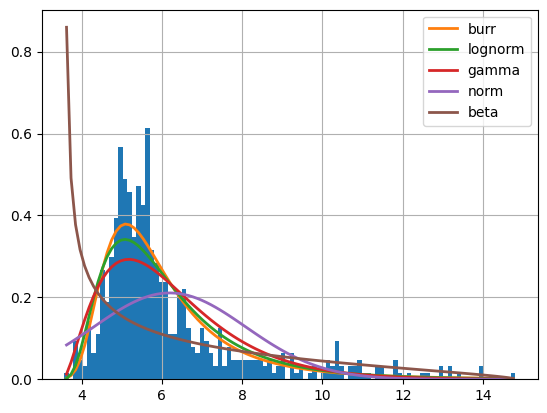

In [31]:
f = Fitter(dataset['HbA1c'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

<Axes: ylabel='Count'>

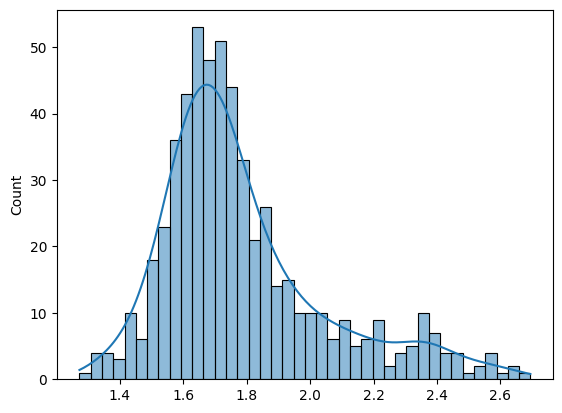

In [32]:
hba1c_log_transform = np.log(dataset['HbA1c'].values)
sns.histplot(hba1c_log_transform, kde=True, bins=40)

In [46]:
dataset.to_csv('~/data/dataset_565.csv', index=None)
pd.Series(data1.columns[:-2].astype(np.float64)).to_csv('~/data/dataset_565_domain.csv', index=None)

In [41]:
pd.Series(data1.columns[:-2].astype(np.float64))

0        400.6456
1        401.1277
2        401.6098
3        402.0919
4        402.5741
          ...    
7462    3998.2590
7463    3998.7410
7464    3999.2240
7465    3999.7060
7466    4000.1880
Length: 7467, dtype: float64

In [45]:
dataset.iloc[:, :-2]

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
42,0.252053,0.253598,0.254435,0.254117,0.252619,0.250394,0.248154,0.246554,0.245932,0.246228,...,0.009220,0.009212,0.009200,0.009187,0.009174,0.009163,0.009157,0.009158,0.009164,0.009176
358,0.213325,0.213964,0.215273,0.216570,0.217357,0.217480,0.217092,0.216491,0.215936,0.215553,...,0.008743,0.008730,0.008720,0.008714,0.008714,0.008721,0.008735,0.008756,0.008780,0.008805
470,0.333689,0.334638,0.335916,0.336971,0.337441,0.337332,0.336952,0.336661,0.336639,0.336771,...,0.011161,0.011143,0.011127,0.011111,0.011097,0.011085,0.011076,0.011070,0.011067,0.011070
451,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012119,0.012100,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098
24,0.290250,0.293067,0.295698,0.297657,0.298885,0.299738,0.300750,0.302287,0.304330,0.306419,...,0.009718,0.009709,0.009711,0.009720,0.009734,0.009752,0.009772,0.009793,0.009814,0.009834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.358854,0.361681,0.364897,0.367508,0.369161,0.370154,0.371139,0.372643,0.374736,0.376910,...,0.009356,0.009357,0.009351,0.009337,0.009317,0.009292,0.009268,0.009246,0.009230,0.009220
519,0.292636,0.295991,0.301918,0.308828,0.315259,0.320217,0.323289,0.324501,0.324086,0.322351,...,0.011333,0.011326,0.011310,0.011289,0.011262,0.011233,0.011204,0.011178,0.011159,0.011150
155,0.355229,0.355985,0.358104,0.360095,0.361085,0.361029,0.360479,0.360146,0.360490,0.361533,...,0.009536,0.009561,0.009585,0.009604,0.009614,0.009612,0.009599,0.009579,0.009558,0.009540
432,0.271155,0.270413,0.270168,0.270236,0.270561,0.271232,0.272381,0.274041,0.276030,0.277946,...,0.010762,0.010764,0.010768,0.010774,0.010782,0.010793,0.010805,0.010820,0.010834,0.010846


In [47]:
pd.read_csv('~/data/dataset.csv')

,1,2,3,4,5,6,7,8,9,10,...,7461,7462,7463,7464,7465,7466,7467,7468,HbA1c,years
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040,5.80,54.0
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646,5.08,45.0
2,0.261524,0.264529,0.267711,0.270232,0.271406,0.271031,0.269475,0.267460,0.265697,0.264599,...,0.007995,0.008008,0.008024,0.008040,0.008058,0.008075,0.008092,0.008107,7.50,70.0
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673,4.46,34.0
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049,5.36,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.253261,0.254469,0.255437,0.255796,0.255311,0.254114,0.252725,0.251827,0.251964,0.253304,...,0.012107,0.012100,0.012086,0.012068,0.012050,0.012036,0.012028,0.012027,9.00,74.0
448,0.352318,0.352299,0.353075,0.353827,0.353893,0.353158,0.352134,0.351675,0.352509,0.354873,...,0.008742,0.008701,0.008674,0.008662,0.008658,0.008657,0.008654,0.008645,6.50,57.0
449,0.224357,0.223553,0.223732,0.224696,0.226143,0.227831,0.229672,0.231706,0.233981,0.236420,...,0.006417,0.006378,0.006347,0.006329,0.006321,0.006323,0.006330,0.006340,9.70,45.0
451,0.332913,0.333179,0.334629,0.336291,0.337391,0.337680,0.337502,0.337541,0.338393,0.340228,...,0.011328,0.011320,0.011305,0.011282,0.011256,0.011230,0.011207,0.011190,7.20,86.0


In [48]:
pd.read_csv('~/data/dataset_565.csv')

,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,404.9847,...,3996.813,3997.295,3997.777,3998.259,3998.741,3999.224,3999.706,4000.188,HbA1c,Age
0,0.252053,0.253598,0.254435,0.254117,0.252619,0.250394,0.248154,0.246554,0.245932,0.246228,...,0.009200,0.009187,0.009174,0.009163,0.009157,0.009158,0.009164,0.009176,5.12,77.0
1,0.213325,0.213964,0.215273,0.216570,0.217357,0.217480,0.217092,0.216491,0.215936,0.215553,...,0.008720,0.008714,0.008714,0.008721,0.008735,0.008756,0.008780,0.008805,4.32,6.0
2,0.333689,0.334638,0.335916,0.336971,0.337441,0.337332,0.336952,0.336661,0.336639,0.336771,...,0.011127,0.011111,0.011097,0.011085,0.011076,0.011070,0.011067,0.011070,5.40,83.0
3,0.341481,0.342185,0.343449,0.344380,0.344394,0.343455,0.341964,0.340445,0.339238,0.338352,...,0.012086,0.012078,0.012076,0.012077,0.012081,0.012085,0.012091,0.012098,10.20,69.0
4,0.290250,0.293067,0.295698,0.297657,0.298885,0.299738,0.300750,0.302287,0.304330,0.306419,...,0.009711,0.009720,0.009734,0.009752,0.009772,0.009793,0.009814,0.009834,4.55,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.358854,0.361681,0.364897,0.367508,0.369161,0.370154,0.371139,0.372643,0.374736,0.376910,...,0.009351,0.009337,0.009317,0.009292,0.009268,0.009246,0.009230,0.009220,4.75,5.0
561,0.292636,0.295991,0.301918,0.308828,0.315259,0.320217,0.323289,0.324501,0.324086,0.322351,...,0.011310,0.011289,0.011262,0.011233,0.011204,0.011178,0.011159,0.011150,6.68,73.0
562,0.355229,0.355985,0.358104,0.360095,0.361085,0.361029,0.360479,0.360146,0.360490,0.361533,...,0.009585,0.009604,0.009614,0.009612,0.009599,0.009579,0.009558,0.009540,5.17,58.0
563,0.271155,0.270413,0.270168,0.270236,0.270561,0.271232,0.272381,0.274041,0.276030,0.277946,...,0.010768,0.010774,0.010782,0.010793,0.010805,0.010820,0.010834,0.010846,11.40,48.0
